In [1]:
# Import other modules not related to PySpark
import os
import sys 
import seaborn as sns 
import pandas as pd
from pandas import DataFrame
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import matplotlib 
from mpl_toolkits.mplot3d import Axes3D
import math
from IPython.core.interactiveshell import InteractiveShell
from datetime import *
import statistics as stats
# This helps auto print out the items without explixitly using 'print'
InteractiveShell.ast_node_interactivity = "all" 
%matplotlib inline 

In [2]:
df = pd.read_csv('Matrice Incident (1) (1).csv' , sep=";")
pd.set_option('display.max_columns', None)
df.drop(columns=['Unnamed: 20'] , inplace=True)

df.head()

,ID table,N° de CI,Nom CI,Code appli,Société,Code question,Question,Réponse,Groupe 1,GROUP_ID_1,Groupe 2,GROUP_ID_2,Groupe 3,GROUP_ID_3,Groupe 4,Train 1,Train 2,Train 3,Gestion des incidents,Switch AMI
0,474,APP00001,Pilotage activité (CLARITY),CLY,-,REP_APP_SQL,Le problème porte sur,Un problème sur le CRA,CLY DSI CLARITY,88,NaN,NaN,NaN,NaN,NaN,LPM,NaN,NaN,1.0,1.0
1,475,APP00001,Pilotage activité (CLARITY),CLY,-,REP_APP_SQL,Le problème porte sur,Un problème d'accès à l'application Clarity,AMI SIEGE,19,CLY DSI CLARITY,88.0,NaN,NaN,NaN,AMI,LPM,NaN,1.0,1.0
2,476,APP00001,Pilotage activité (CLARITY),CLY,-,REP_APP_SQL,Le problème porte sur,Autre,CLY DSI CLARITY,88,NaN,NaN,NaN,NaN,NaN,LPM,NaN,NaN,1.0,1.0
3,477,APP00001,Pilotage activité (CLARITY),CLY,-,REP_APP_SQL,Le problème porte sur,Une question ou un problème sur un projet Clar...,CLY DSI CLARITY,88,NaN,NaN,NaN,NaN,NaN,LPM,NaN,NaN,1.0,1.0
4,478,APP00001,Pilotage activité (CLARITY),CLY,-,REP_APP_SQL,Le problème porte sur,Un problème sur les feuilles de temps,CLY DSI CLARITY,88,NaN,NaN,NaN,NaN,NaN,LPM,NaN,NaN,1.0,1.0


In [3]:
df[df['Code appli']=='BCP']

,ID table,N° de CI,Nom CI,Code appli,Société,Code question,Question,Réponse,Groupe 1,GROUP_ID_1,Groupe 2,GROUP_ID_2,Groupe 3,GROUP_ID_3,Groupe 4,Train 1,Train 2,Train 3,Gestion des incidents,Switch AMI
257,789,APP00080,Référentiel - BCP,BCP,-,REP_APP_SQL,Le problème porte sur,L'accès a l'application,AMI SIEGE,19,RBCP - Référentiel BCP,7311.0,NaN,NaN,NaN,AMI,Millenium,NaN,1.0,1.0
258,790,APP00080,Référentiel - BCP,BCP,-,REP_APP_SQL,Le problème porte sur,Un problème sur l'application,RBCP - Référentiel BCP,7311,NaN,NaN,NaN,NaN,NaN,Millenium,NaN,NaN,1.0,1.0


In [6]:
df_extract_groups = df[['Code appli' , 'Groupe 1' ,'GROUP_ID_1', 'Groupe 2' ,'GROUP_ID_2', 'Groupe 3' ,'GROUP_ID_3']]
df_extract_groups   

,Code appli,Groupe 1,GROUP_ID_1,Groupe 2,GROUP_ID_2,Groupe 3,GROUP_ID_3
0,CLY,CLY DSI CLARITY,88,NaN,NaN,NaN,NaN
1,CLY,AMI SIEGE,19,CLY DSI CLARITY,88.0,NaN,NaN
2,CLY,CLY DSI CLARITY,88,NaN,NaN,NaN,NaN
3,CLY,CLY DSI CLARITY,88,NaN,NaN,NaN,NaN
4,CLY,CLY DSI CLARITY,88,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...
1686,CCI,FIA - Team FIA-STG,7316,NaN,NaN,NaN,NaN
1687,IFG,AMI SIEGE,19,CMD - Comptoirs Market Data,7307.0,NaN,NaN
1688,IFG,CMD - Comptoirs Market Data,7307,NaN,NaN,NaN,NaN
1689,MSE,DIET - DIET,7826,NaN,NaN,NaN,NaN


In [7]:
code_appli_groups = {}

# Iterate through each row in the DataFrame
for index, row in df_extract_groups.iterrows():
    code = row['Code appli']
    groups = row[['Groupe 1', 'Groupe 2', 'Groupe 3']].dropna().tolist()
    group_ids = row[['GROUP_ID_1', 'GROUP_ID_2', 'GROUP_ID_3']].dropna().tolist()
    
    group_info = list(zip(groups, group_ids))
    
    if code in code_appli_groups:
        code_appli_groups[code].update(group_info)
    else:
        code_appli_groups[code] = set(group_info)

# Convert sets back to lists for a more readable output
code_appli_groups = {k: list(v) for k, v in code_appli_groups.items()}

# Display the result
for code, group_info in code_appli_groups.items():
    print(f"Code appli: {code}")
    for group, group_id in group_info:
        print(f"Group: {group}, Group ID: {group_id}")


Code appli: CLY
Group: AMI SIEGE, Group ID: 19
Group: CLY DSI CLARITY, Group ID: 88
Code appli: PRT
Group: INO CASSIOPAE WEB SII METIER, Group ID: 180
Group: PRT, Group ID: 7373.0
Group: INO CASSIOPAE WEB SRR METIER, Group ID: 181
Group: AMI SIEGE, Group ID: 19
Group: INO CASSIOPAE WEB CONTENTIEUX METIER, Group ID: 188
Group: COF CASSIOPAE WEB CONTENTIEUX METIER, Group ID: 227
Group: INO CASSIOPAE WEB METIER, Group ID: 33
Group: COF CASSIOPAE WEB SII METIER, Group ID: 31
Group: COF CASSIOPAE WEB SI2E METIER, Group ID: 30
Code appli: CBM
Group: COF CASSIOPAE CBM CONTENTIEUX, Group ID: 5543
Group: AMI SIEGE, Group ID: 19
Group: COF CASSIOPAE CBM METIER, Group ID: 23
Group: KSP - KSPTMA, Group ID: 7367.0
Code appli: SVI
Group: AMI SIEGE, Group ID: 19
Group: SVI - Team SVI, Group ID: 7312
Group: INV SUIVI DES PARTICIPATIONS METIER, Group ID: 126.0
Group: INV VALORISATION DES PARTICIPATIONS METIER, Group ID: 128.0
Code appli: PDE
Group: DFCB - Core Factory, Group ID: 7309
Group: TSE - IAE, 

In [4]:
code_appli_groups = {}

# Iterate through each row in the DataFrame
for index, row in df_extract_groups.iterrows():
    code = row['Code appli']
    groups = row[['Groupe 1', 'Groupe 2', 'Groupe 3', 'Groupe 4']].dropna().tolist()
    
    if code in code_appli_groups:
        code_appli_groups[code].update(groups)
    else:
        code_appli_groups[code] = set(groups)

# Convert sets back to lists for a more readable output
code_appli_groups = {k: list(v) for k, v in code_appli_groups.items()}

# Display the result
code_appli_groups

{'CLY': ['AMI SIEGE', 'CLY DSI CLARITY'],
 'PRT': ['INO CASSIOPAE WEB CONTENTIEUX METIER',
  'INO CASSIOPAE WEB METIER',
  'COF CASSIOPAE WEB CONTENTIEUX METIER',
  'PRT',
  'COF CASSIOPAE WEB SI2E METIER',
  'COF CASSIOPAE WEB SII METIER',
  'INO CASSIOPAE WEB SII METIER',
  'AMI SIEGE',
  'INO CASSIOPAE WEB SRR METIER'],
 'CBM': ['KSP - KSPTMA',
  'AMI SIEGE',
  'COF CASSIOPAE CBM METIER',
  'COF CASSIOPAE CBM CONTENTIEUX'],
 'SVI': ['SVI - Team SVI',
  'AMI SIEGE',
  'INV SUIVI DES PARTICIPATIONS METIER',
  'INV VALORISATION DES PARTICIPATIONS METIER'],
 'PDE': ['DFCB - Core Factory',
  'DATA - Team usages DATA',
  'DFR - Factory Risque',
  'TSE - IAE',
  'DFF - Factory Finance',
  'VZT - VizTech'],
 'SLM': ['DAB', 'SCP - Socle Comptable'],
 'OSR': ['OSR - OSR', 'INNO OSR METIER'],
 'HRA': ['EVS - Evolution du Socle SIRH',
  'SRH GA-PAIE INVESTISSEMENT',
  'SRH GA-PAIE FINANCEMENT',
  'TLT - Talents',
  'RH ADP',
  'GPT - Gestion Paie et Temps',
  'SRH FORMATION INVESTISSEMENT',
  '

In [4]:
null_percentage = df.isnull().mean() * 100

null_percentage_sorted = null_percentage.sort_values(ascending=False)

null_percentage_sorted  

Groupe 4                 100.000000
Train 3                   94.559432
GROUP_ID_3                94.086339
Groupe 3                  94.086339
Train 2                   70.017741
Groupe 2                  65.937315
GROUP_ID_2                65.937315
Switch AMI                24.541691
Train 1                   13.956239
Gestion des incidents     13.364873
Code appli                 1.478415
Groupe 1                   0.000000
GROUP_ID_1                 0.000000
N° de CI                   0.000000
Réponse                    0.000000
Question                   0.000000
Code question              0.000000
Société                    0.000000
Nom CI                     0.000000
ID table                   0.000000
dtype: float64

In [10]:
df.describe()

,ID table,GROUP_ID_1,GROUP_ID_2,GROUP_ID_3,Groupe 4,Gestion des incidents,Switch AMI
count,1691.000000,1691.000000,576.000000,100.000000,0.0,1465.000000,1276.000000
mean,1411.928445,3960.302779,5556.663194,8492.970000,NaN,0.924232,0.970219
std,529.272425,3976.667392,3383.994652,2224.476565,NaN,0.264717,0.170048
min,474.000000,8.000000,8.000000,5.000000,NaN,0.000000,0.000000
25%,963.500000,19.000000,356.750000,9091.000000,NaN,1.000000,1.000000
50%,1405.000000,2460.000000,7309.000000,9325.000000,NaN,1.000000,1.000000
75%,1841.500000,7359.000000,7366.000000,9325.000000,NaN,1.000000,1.000000
max,2351.000000,12042.000000,12145.000000,9462.000000,NaN,1.000000,1.000000


In [11]:
df['Société'].value_counts() 

-                             1630
Bpifrance                       17
Bpifrance Assurance Export      16
Bpifrance Investissement        15
Bpifrance Courtage              13
Name: Société, dtype: int64

In [5]:
df['Code appli'].value_counts() 

QLS    69
HRA    47
RBP    34
XRM    29
GDC    23
       ..
SRC     1
RCT     1
MTM     1
DCE     1
DAG     1
Name: Code appli, Length: 605, dtype: int64

In [18]:
df['Gestion des incidents'].value_counts() 

1.0    1354
0.0     111
Name: Gestion des incidents, dtype: int64

<AxesSubplot:>

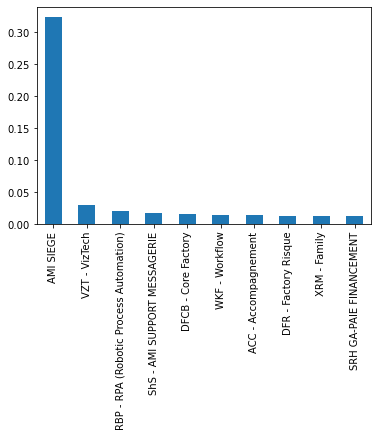

In [17]:
df['Groupe 1'].value_counts(normalize=True).head(10).plot(kind='bar')

In [9]:
df_qlik_buo = df[(df['Code appli']=='QLS') | (df['Code appli']=='BUO')   ] 

In [27]:
import plotly.express as px

# Assuming df_qlik_buo is your DataFrame
agg_data = df_qlik_buo.groupby(['Code appli', 'Groupe 1']).size().reset_index(name='Count')

# Create an interactive grouped bar chart using Plotly Express
fig = px.bar(agg_data, x='Code appli', y='Count', color='Groupe 1', barmode='group',
             title='Relationship between Code appli and Groupe 1',
             labels={'Code appli': 'Code appli', 'Count': 'Count of Incidents', 'Groupe 1': 'Groupe 1'})

fig.update_layout(xaxis={'categoryorder':'total descending'})  # Optional: Sort x-axis categories


In [28]:
df_qlik_buo[df_qlik_buo['Groupe 3'].isnull()==False] 

,ID table,N° de CI,Nom CI,Code appli,Société,Code question,Question,Réponse,Groupe 1,GROUP_ID_1,Groupe 2,GROUP_ID_2,Groupe 3,GROUP_ID_3,Groupe 4,Train 1,Train 2,Train 3,Gestion des incidents,Switch AMI


In [25]:
df_qlik_buo[df_qlik_buo['Groupe 2'].isnull()==False]   

,ID table,N° de CI,Nom CI,Code appli,Société,Code question,Question,Réponse,Groupe 1,GROUP_ID_1,Groupe 2,GROUP_ID_2,Groupe 3,GROUP_ID_3,Groupe 4,Train 1,Train 2,Train 3,Gestion des incidents,Switch AMI
101,605,APP00220,Qlik Sense,QLS,-,REP_APP_SQL,Le problème porte sur,PAM - Pilotage de l'Activité Middle,DVN - Data Visualisation,7308,QLS PAM - Pilotage de l'Activité Middle,5586.0,NaN,NaN,NaN,Millenium,NaN,NaN,1.0,1.0
1488,2138,APP00220,Qlik Sense,QLS,-,REP_APP_SQL,Le problème porte sur,ECM_COLLATERAL_MANAGEMENT,DFF - Factory Finance,7344,QLS Collateral Management - TRICP,5592.0,NaN,NaN,NaN,Finspark,NaN,NaN,1.0,1.0


In [44]:
df[(df['Code appli']=='BUO')==True]  

,ID table,N° de CI,Nom CI,Code appli,Société,Code question,Question,Réponse,Groupe 1,GROUP_ID_1,Groupe 2,GROUP_ID_2,Groupe 3,GROUP_ID_3,Groupe 4,Train 1,Train 2,Train 3,Gestion des incidents,Switch AMI
81,568,APP00156,Business Object,BUO,-,REP_APP_SQL,Le problème porte sur,L'accès à l'application,VZT - VizTech,8696,NaN,NaN,NaN,NaN,NaN,Millenium,NaN,NaN,1.0,1.0
82,569,APP00156,Business Object,BUO,-,REP_APP_SQL,Le problème porte sur,Reporting : Atrium,DFCB - Core Factory,7309,NaN,NaN,NaN,NaN,NaN,Millenium,NaN,NaN,1.0,1.0
83,570,APP00156,Business Object,BUO,-,REP_APP_SQL,Le problème porte sur,Reporting : Client,DFCB - Core Factory,7309,NaN,NaN,NaN,NaN,NaN,Millenium,NaN,NaN,1.0,1.0
84,571,APP00156,Business Object,BUO,-,REP_APP_SQL,Le problème porte sur,Reporting : Activité Commerciale,DFCB - Core Factory,7309,NaN,NaN,NaN,NaN,NaN,Millenium,NaN,NaN,1.0,1.0
85,572,APP00156,Business Object,BUO,-,REP_APP_SQL,Le problème porte sur,Reporting : Engagements,DFR - Factory Risque,7348,NaN,NaN,NaN,NaN,NaN,Millenium,NaN,NaN,1.0,1.0
86,573,APP00156,Business Object,BUO,-,REP_APP_SQL,Le problème porte sur,Reporting : Suivi Production (décision),DFR - Factory Risque,7348,NaN,NaN,NaN,NaN,NaN,Millenium,NaN,NaN,1.0,1.0
87,575,APP00156,Business Object,BUO,-,REP_APP_SQL,Le problème porte sur,Reporting : Innovation,DFCB - Core Factory,7309,NaN,NaN,NaN,NaN,NaN,Millenium,NaN,NaN,1.0,1.0
88,576,APP00156,Business Object,BUO,-,REP_APP_SQL,Le problème porte sur,Reporting : Investissement,DATA - Team usages DATA,8536,NaN,NaN,NaN,NaN,NaN,Prety Train,NaN,NaN,1.0,1.0
89,577,APP00156,Business Object,BUO,-,REP_APP_SQL,Le problème porte sur,Reporting : Comptable,DFCB - Core Factory,7309,NaN,NaN,NaN,NaN,NaN,Millenium,NaN,NaN,1.0,1.0
90,578,APP00156,Business Object,BUO,-,REP_APP_SQL,Le problème porte sur,Reporting : Prêts,DFCB - Core Factory,7309,NaN,NaN,NaN,NaN,NaN,Millenium,NaN,NaN,1.0,1.0


In [20]:
df_qlik_buo['Groupe 2'].value_counts()   

QLS PAM - Pilotage de l'Activité Middle    1
QLS Collateral Management - TRICP          1
Name: Groupe 2, dtype: int64

In [21]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
import plotly.graph_objects as go


group_columns = ['Groupe 1', 'Groupe 2', 'Groupe 3', 'Groupe 4']
transitions = []

for _, row in df_qlik_buo.iterrows():
    previous_group = None
    for group in group_columns:
        current_group = row[group]
        if pd.notna(current_group):
            if previous_group is not None:
                transitions.append((previous_group, current_group))
            previous_group = current_group

# Create a mapping of groups to indices
all_groups = pd.unique(df[group_columns].values.ravel('K'))
all_groups = all_groups[pd.notna(all_groups)]
group_indices = {group: i for i, group in enumerate(all_groups)}

# Extract source, target and value for the Sankey diagram
source = [group_indices[src] for src, tgt in transitions]
target = [group_indices[tgt] for src, tgt in transitions]
value = [transitions.count((src, tgt)) for src, tgt in transitions]

# Create the Sankey diagram
fig = go.Figure(data=[go.Sankey(
    node=dict(
        pad=15, 
        thickness=20,
        line=dict(color="black", width=0.5),
        label=list(group_indices.keys()),
    ),
    link=dict(
        source=source,
        target=target,
        value=value,
    ))])

fig.update_layout(title_text="Incident Management Group Relationships", font_size=10)


In [32]:
df.columns

Index(['ID table', 'N° de CI', 'Nom CI', 'Code appli', 'Société',
       'Code question', 'Question', 'Réponse', 'Groupe 1', 'GROUP_ID_1',
       'Groupe 2', 'GROUP_ID_2', 'Groupe 3', 'GROUP_ID_3', 'Groupe 4',
       'Train 1', 'Train 2', 'Train 3', 'Gestion des incidents', 'Switch AMI'],
      dtype='object')

In [37]:
df['Question'].value_counts() 

Le problème porte sur                                1587
Précisez le problème                                   26
Précisez le type de problème                           26
Merci de préciser la direction du bénéficiaire         14
Catégorie CP1                                           8
Service de gestion concerné :                           6
Catégorie CP2                                           6
Catégorie Risques et Incidents                          6
Précisez le type de dossier                             4
Merci de préciser le périmètre de votre problème:       2
Type d'anomalie                                         2
Application                                             2
RTO                                                     2
Name: Question, dtype: int64

In [35]:
df[df['Code appli']=='HRA'] 

,ID table,N° de CI,Nom CI,Code appli,Société,Code question,Question,Réponse,Groupe 1,GROUP_ID_1,Groupe 2,GROUP_ID_2,Groupe 3,GROUP_ID_3,Groupe 4,Train 1,Train 2,Train 3,Gestion des incidents,Switch AMI
44,527,APP00107,Self-service RH (HRAccess),HRA,Bpifrance Investissement,REP_APP_SQL,Le problème porte sur,Les données personnelles ( Exemple : erreur da...,SRH GA-PAIE INVESTISSEMENT,166,GPT - Gestion Paie et Temps,168.0,EVS - Evolution du Socle SIRH,9325.0,NaN,NaN,Tramway RH,Tramway RH,1.0,1.0
45,528,APP00107,Self-service RH (HRAccess),HRA,Bpifrance Investissement,REP_APP_SQL,Le problème porte sur,L'épargne salariale,SRH GA-PAIE INVESTISSEMENT,166,GPT - Gestion Paie et Temps,168.0,EVS - Evolution du Socle SIRH,9325.0,NaN,NaN,Tramway RH,Tramway RH,1.0,1.0
46,529,APP00107,Self-service RH (HRAccess),HRA,Bpifrance,REP_APP_SQL,Le problème porte sur,Les données personnelles ( Exemple : erreur da...,RH ADP,11673,GPT - Gestion Paie et Temps,168.0,EVS - Evolution du Socle SIRH,9325.0,NaN,NaN,Tramway RH,Tramway RH,1.0,1.0
47,530,APP00107,Self-service RH (HRAccess),HRA,Bpifrance,REP_APP_SQL,Le problème porte sur,L'épargne salariale,SRH GA-PAIE FINANCEMENT,165,GPT - Gestion Paie et Temps,168.0,EVS - Evolution du Socle SIRH,9325.0,NaN,NaN,Tramway RH,Tramway RH,1.0,1.0
48,531,APP00107,Self-service RH (HRAccess),HRA,Bpifrance,REP_APP_SQL,Le problème porte sur,La période d'essai ou d'adaptation,SRH GA-PAIE FINANCEMENT,165,GPT - Gestion Paie et Temps,168.0,EVS - Evolution du Socle SIRH,9325.0,NaN,NaN,Tramway RH,Tramway RH,1.0,1.0
49,532,APP00107,Self-service RH (HRAccess),HRA,Bpifrance,REP_APP_SQL,Le problème porte sur,L'accès à l'application,GPT - Gestion Paie et Temps,168,EVS - Evolution du Socle SIRH,9325.0,NaN,NaN,NaN,Tramway RH,Tramway RH,NaN,1.0,1.0
50,533,APP00107,Self-service RH (HRAccess),HRA,Bpifrance Investissement,REP_APP_SQL,Le problème porte sur,L'accès à l'application,GPT - Gestion Paie et Temps,168,EVS - Evolution du Socle SIRH,9325.0,NaN,NaN,NaN,Tramway RH,Tramway RH,NaN,1.0,1.0
51,534,APP00107,Self-service RH (HRAccess),HRA,Bpifrance Assurance Export,REP_APP_SQL,Le problème porte sur,Les données personnelles ( Exemple : erreur da...,SRH GA-PAIE ASSURANCE EXPORT,270,GPT - Gestion Paie et Temps,168.0,EVS - Evolution du Socle SIRH,9325.0,NaN,NaN,Tramway RH,Tramway RH,1.0,1.0
52,535,APP00107,Self-service RH (HRAccess),HRA,Bpifrance Assurance Export,REP_APP_SQL,Le problème porte sur,L'épargne salariale,SRH GA-PAIE ASSURANCE EXPORT,270,GPT - Gestion Paie et Temps,168.0,EVS - Evolution du Socle SIRH,9325.0,NaN,NaN,Tramway RH,Tramway RH,1.0,1.0
53,536,APP00107,Self-service RH (HRAccess),HRA,Bpifrance Assurance Export,REP_APP_SQL,Le problème porte sur,La période d'essai ou d'adaptation,SRH GA-PAIE ASSURANCE EXPORT,270,GPT - Gestion Paie et Temps,168.0,EVS - Evolution du Socle SIRH,9325.0,NaN,NaN,Tramway RH,Tramway RH,1.0,1.0


<Figure size 864x576 with 0 Axes>

Text(0.5, 1.0, 'Incident Management Group Relationships')

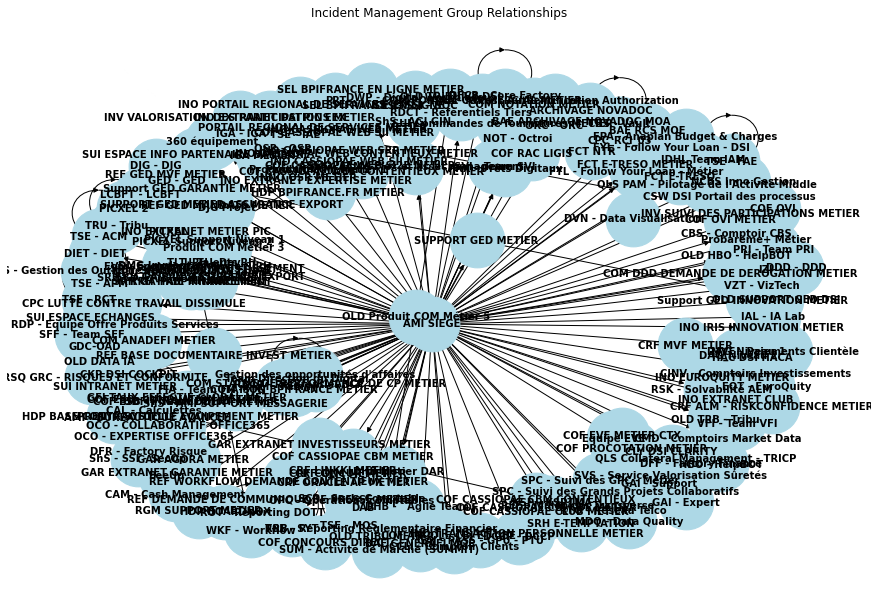

In [13]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt



# Extract groups and their transitions
group_columns = ['Groupe 1', 'Groupe 2' ,'Groupe 3', 'Groupe 4'  ]
transitions = []

for _, row in df.iterrows():
    previous_group = None
    for group in group_columns:
        current_group = row[group]
        if pd.notna(current_group):
            if previous_group is not None:
                transitions.append((previous_group, current_group))
            previous_group = current_group

# Create a directed graph 
G = nx.DiGraph()
G.add_edges_from(transitions)

# Plot the graph
plt.figure(figsize=(12, 8))
pos = nx.spring_layout(G)
nx.draw(G, pos, with_labels=True, node_size=3000, node_color="lightblue", font_size=10, font_weight="bold", arrows=True)
plt.title('Incident Management Group Relationships')
plt.show()


In [50]:
df.head()

,ID table,N° de CI,Nom CI,Code appli,Société,Code question,Question,Réponse,Groupe 1,GROUP_ID_1,Groupe 2,GROUP_ID_2,Groupe 3,GROUP_ID_3,Groupe 4,Train 1,Train 2,Train 3,Gestion des incidents,Switch AMI
0,474,APP00001,Pilotage activité (CLARITY),CLY,-,REP_APP_SQL,Le problème porte sur,Un problème sur le CRA,CLY DSI CLARITY,88,NaN,NaN,NaN,NaN,NaN,LPM,NaN,NaN,1.0,1.0
1,475,APP00001,Pilotage activité (CLARITY),CLY,-,REP_APP_SQL,Le problème porte sur,Un problème d'accès à l'application Clarity,AMI SIEGE,19,CLY DSI CLARITY,88.0,NaN,NaN,NaN,AMI,LPM,NaN,1.0,1.0
2,476,APP00001,Pilotage activité (CLARITY),CLY,-,REP_APP_SQL,Le problème porte sur,Autre,CLY DSI CLARITY,88,NaN,NaN,NaN,NaN,NaN,LPM,NaN,NaN,1.0,1.0
3,477,APP00001,Pilotage activité (CLARITY),CLY,-,REP_APP_SQL,Le problème porte sur,Une question ou un problème sur un projet Clar...,CLY DSI CLARITY,88,NaN,NaN,NaN,NaN,NaN,LPM,NaN,NaN,1.0,1.0
4,478,APP00001,Pilotage activité (CLARITY),CLY,-,REP_APP_SQL,Le problème porte sur,Un problème sur les feuilles de temps,CLY DSI CLARITY,88,NaN,NaN,NaN,NaN,NaN,LPM,NaN,NaN,1.0,1.0


In [53]:
df['Réponse'].dtype

dtype('O')

<Figure size 1152x576 with 0 Axes>

(-0.5, 399.5, 199.5, -0.5)

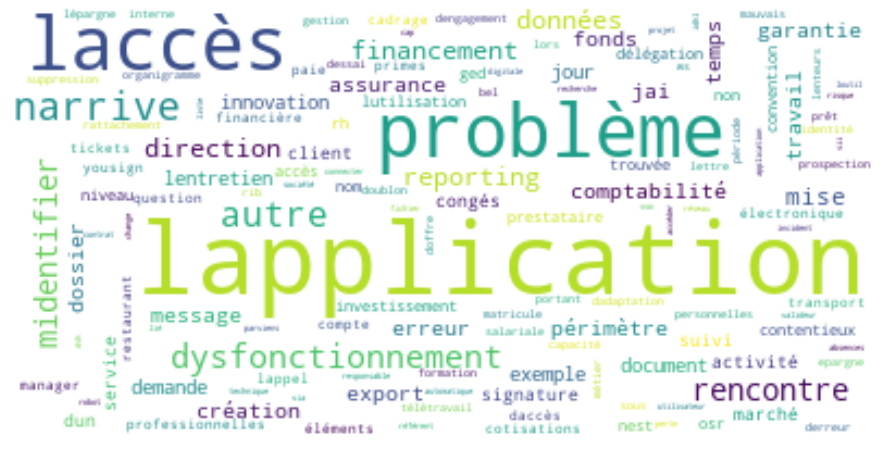

In [56]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import string
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

# Concatenate strings in the 'Réponse' column into a single string
def clean_text(text):
    # Remove punctuation
    text = text.translate(str.maketrans('', '', string.punctuation))
    # Convert to lowercase
    text = text.lower()
    # Tokenize text
    tokens = word_tokenize(text)
    # Remove stopwords
    stop_words = set(stopwords.words('french'))  # Adjust language as needed
    tokens = [word for word in tokens if word not in stop_words]
    # Join tokens back into a single string
    cleaned_text = ' '.join(tokens)
    return cleaned_text

# Clean the text in the 'Réponse' column
cleaned_text = df['Réponse'].apply(clean_text)

# Concatenate cleaned text into a single string
cleaned_text_combined = ' '.join(cleaned_text)

# Generate the word cloud
wordcloud = WordCloud(collocations=False, background_color='white').generate(cleaned_text_combined)

# Plot the word cloud
plt.figure(figsize=(16, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [21]:
import pandas as pd 
from nltk.tokenize import sent_tokenize
from nltk.tokenize import word_tokenize
import re 
import spacy
from spacy.lang.fr.stop_words import STOP_WORDS
import string 
from textblob import Blobber
from textblob_fr import PatternTagger, PatternAnalyzer
tb = Blobber(pos_tagger=PatternTagger(), analyzer=PatternAnalyzer())
import plotly.graph_objects as go
import plotly.express as px 

In [25]:
import spacy
from spacy.lang.fr.stop_words import STOP_WORDS
import pandas as pd

df["Réponse"]= df["Réponse"].str.lower() 

reponse_tok=[]
for comment in df["Réponse"].apply(str):
    Word_Tok = []
    for word in  re.sub("\W"," ",comment ).split():
        Word_Tok.append(word)
    reponse_tok.append(Word_Tok)  
df["rep_Tok"]= reponse_tok 


# Assuming you have your DataFrame 'df' with a column 'rep_Tok'

# Load SpaCy's French model
nlp = spacy.load("fr_core_news_sm")

# Create a set of stop words
stop_words = set(STOP_WORDS)

# List of words to be removed from the stop words set
deselect_stop_words = ['n\'', 'ne', 'pas', 'plus', 'personne', 'aucun', 'ni', 'aucune', 'rien', 'un' , 
                       'alors', 'au', 'aucuns', 'aussi', 'autre', 'avant', 'avec', 'avoir',
                       'bon', 'car', 'ce', 'cela', 'ces', 'ceux', 'chaque', 'ci', 'comme',
                       'comment', 'dans', 'des', 'du', 'dedans', 'dehors', 'depuis', 'devrait',
                       'doit', 'donc', 'dos', 'droite', 'début', 'elle', 'elles', 'en', 'encore',
                       'essai', 'est', 'et', 'eu', 'fait', 'faites', 'fois', 'font', 'force', 'haut',
                       'hors', 'ici', 'il', 'ils', 'je', 'juste', 'la', 'le', 'les', 'leur', 'là',
                       'ma', 'maintenant', 'mais', 'mes', 'mine', 'moins', 'mon', 'mot', 'même',
                       'ni', 'nommés', 'notre', 'nous', 'nouveaux', 'ou', 'où', 'par', 'parce',
                       'parole', 'pas', 'personnes', 'peut', 'peu', 'plupart', 'pour', 'pourquoi',
                       'quand', 'que', 'quel', 'quelle', 'quelles', 'quels', 'qui', 'sa', 'sans',
                       'ses', 'seulement', 'si', 'sien', 'son', 'sont', 'sous', 'soyez', 'sujet',
                       'sur', 'ta', 'tandis', 'tellement', 'tels', 'tes', 'ton', 'tous', 'tout',
                       'trop', 'très', 'tu', 'voient', 'vont', 'votre', 'vous', 'vu', 'ça', 'étaient',
                       'état', 'étions', 'été', 'être']

# Remove specific words from the stop words set
for w in deselect_stop_words:
    stop_words.discard(w)

# Function to remove stop words from a tokenized comment
def remove_stop_words_from_comment(comment):
    return [w for w in comment if not ((w in stop_words) or (len(w) == 1))]

# Apply the function to the 'rep_Tok' column and create a new column 'repAfterPreproc'
df['repAfterPreproc'] = df['rep_Tok'].apply(lambda comment: ' '.join(remove_stop_words_from_comment(comment)))

# Display the DataFrame
df.head()


,ID table,N° de CI,Nom CI,Code appli,Société,Code question,Question,Réponse,Groupe 1,GROUP_ID_1,Groupe 2,GROUP_ID_2,Groupe 3,GROUP_ID_3,Groupe 4,Train 1,Train 2,Train 3,Gestion des incidents,Switch AMI,rep_Tok,repAfterPreproc
0,474,APP00001,Pilotage activité (CLARITY),CLY,-,REP_APP_SQL,Le problème porte sur,Un problème sur le CRA,CLY DSI CLARITY,88,NaN,NaN,NaN,NaN,NaN,LPM,NaN,NaN,1.0,1.0,"[Un, problème, sur, le, CRA]",Un problème sur le CRA
1,475,APP00001,Pilotage activité (CLARITY),CLY,-,REP_APP_SQL,Le problème porte sur,Un problème d'accès à l'application Clarity,AMI SIEGE,19,CLY DSI CLARITY,88.0,NaN,NaN,NaN,AMI,LPM,NaN,1.0,1.0,"[Un, problème, d, accès, à, l, application, Cl...",Un problème accès application Clarity
2,476,APP00001,Pilotage activité (CLARITY),CLY,-,REP_APP_SQL,Le problème porte sur,Autre,CLY DSI CLARITY,88,NaN,NaN,NaN,NaN,NaN,LPM,NaN,NaN,1.0,1.0,[Autre],Autre
3,477,APP00001,Pilotage activité (CLARITY),CLY,-,REP_APP_SQL,Le problème porte sur,Une question ou un problème sur un projet Clar...,CLY DSI CLARITY,88,NaN,NaN,NaN,NaN,NaN,LPM,NaN,NaN,1.0,1.0,"[Une, question, ou, un, problème, sur, un, pro...",Une question ou un problème sur un projet Clar...
4,478,APP00001,Pilotage activité (CLARITY),CLY,-,REP_APP_SQL,Le problème porte sur,Un problème sur les feuilles de temps,CLY DSI CLARITY,88,NaN,NaN,NaN,NaN,NaN,LPM,NaN,NaN,1.0,1.0,"[Un, problème, sur, les, feuilles, de, temps]",Un problème sur les feuilles temps


In [27]:
df_rep = df[['rep_Tok' , 'repAfterPreproc']]
df_rep 

,rep_Tok,repAfterPreproc
0,"[Un, problème, sur, le, CRA]",Un problème sur le CRA
1,"[Un, problème, d, accès, à, l, application, Cl...",Un problème accès application Clarity
2,[Autre],Autre
3,"[Une, question, ou, un, problème, sur, un, pro...",Une question ou un problème sur un projet Clar...
4,"[Un, problème, sur, les, feuilles, de, temps]",Un problème sur les feuilles temps
...,...,...
1686,"[Un, problème, sur, l, application]",Un problème sur application
1687,"[L, accès, a, l, application]",accès application
1688,"[Un, problème, sur, l, application]",Un problème sur application
1689,"[L, accès, a, l, application]",accès application


In [29]:
from collections import Counter

# check for commun words 

df_rep['Cleaned rep Split'] = df['repAfterPreproc'].apply(lambda x:str(x).split())
top = Counter([item for sublist in df_rep['Cleaned rep Split'] for item in sublist])
temp = pd.DataFrame(top.most_common(30))
temp.columns = ['Common_words','count']     
temp.style.background_gradient(cmap='Blues')     

C:\Users\ahmed\AppData\Local\Temp\ipykernel_15576\2518655438.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_rep['Cleaned rep Split'] = df['repAfterPreproc'].apply(lambda x:str(x).split())


,Common_words,count
0,application,1191
1,sur,616
2,accès,576
3,problème,572
4,Un,563
5,Je,80
6,pas,65
7,un,52
8,arrive,41
9,des,33


In [58]:
import re 
df_rep = df[['Réponse'  ]] 

# Define a function to clean the text
def clean(text):
# Removes all special characters and numericals leaving the alphabets
    text = re.sub('[^A-Za-z]+', ' ', str(text))
    text = str(text).lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)  
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)
    return text

# Cleaning the text in the review column
df_rep['Cleaned Réponse'] = df_rep['Réponse'].apply(clean)
df_rep.head()

C:\Users\ahmed\AppData\Local\Temp\ipykernel_23988\2585421781.py:17: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,Réponse,Cleaned Réponse
0,Un problème sur le CRA,un probl me sur le cra
1,Un problème d'accès à l'application Clarity,un probl me d acc s l application clarity
2,Autre,autre
3,Une question ou un problème sur un projet Clar...,une question ou un probl me sur un projet clar...
4,Un problème sur les feuilles de temps,un probl me sur les feuilles de temps
